### gmarket 베스트 200 상품 데이터 수집
- 상품 데이터 수집
- 상품 이미지 데이터 수집

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [1]:
# 1. 웹서비스 분석: url
url = "http://corners.gmarket.co.kr/Bestsellers"

In [3]:
# 2. request(url) > response: html
response = requests.get(url)

In [22]:
# 3. html(str) > bs, css-selector > DataFrame

# bs 객체 만들기
dom = BeautifulSoup(response.text, "html.parser")

# 상품 리스트 200개 선택하기
elements = dom.select("#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li")

In [29]:
# 각 상품에서 데이터(상품명, 원가, 판매가, 이미지 URL, 상세 페이지 링크) 수집
element = elements[0]
datum = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img.lazy").get("data-original"),
    "o-price": element.select_one(".o-price").text,
    "s-price": element.select_one(".s-price > strong > span > span").text,
}
datum

{'title': '씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권)',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=962002144&ver=637811369783580343',
 'img': 'http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214',
 'o-price': '79,900원',
 's-price': '24,000원'}

In [30]:
# 데이터프레임으로 만들기
data = []
for element in elements:
    data.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": element.select_one("img.lazy").get("data-original"),
        "o-price": element.select_one(".o-price").text,
        "s-price": element.select_one(".s-price > strong > span > span").text,
    })

df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o-price,s-price
198,[설화수]설화수 순행 클렌징폼 200ml +미니어처 5종증정,http://item.gmarket.co.kr/Item?goodscode=18706...,http://gdimg.gmarket.co.kr/1870699583/still/30...,"39,900원","29,900원"
199,[더블에이]더블에이 A4 복사용지 80g 4000매 2BOX/A4용지,http://item.gmarket.co.kr/Item?goodscode=77205...,http://gdimg.gmarket.co.kr/772056310/still/300...,"48,960원","42,600원"


In [31]:
# 4. download images
!mkdir data

In [32]:
%ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B4BD-2247

 c:\Users\myblo\���� ȭ��\2022\aivle2201\python_crawling ���͸�

2022-02-22  ���� 02:57    <DIR>          .
2022-02-22  ���� 02:57    <DIR>          ..
2022-02-21  ���� 01:09           225,874 01_requests_naver_stock.ipynb
2022-02-21  ���� 02:30             8,301 02_kakao_api.ipynb
2022-02-21  ���� 04:38            53,286 03_requests_zigbang.ipynb
2022-02-21  ���� 05:50             5,990 04_requests_headers.ipynb
2022-02-22  ���� 11:34            14,032 05_html_css_selector.ipynb
2022-02-22  ���� 01:53            22,750 06_bs4_naver_relational_keyword.ipynb
2022-02-22  ���� 02:06            23,095 07_mois.ipynb
2022-02-22  ���� 02:57             6,460 08_gmarket.ipynb
2022-02-22  ���� 02:57    <DIR>          data
               8�� ����             359,788 ����Ʈ
               3�� ���͸�  15,144,431,616 ����Ʈ ����


In [36]:
import os

# data 디렉토리가 없으면 만드는 코드
if not os.path.exists("data"):
    os.makedirs("data")

In [37]:
img = df.loc[0, "img"]
print(img)

http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214


In [39]:
response = requests.get(img)
with open("data/test.png", "wb") as file:
    file.write(response.content)

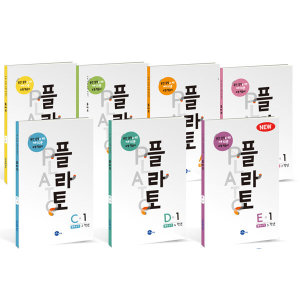

In [40]:
from PIL import Image as pil
pil.open("data/test.png")

In [41]:
df.head(2)

,title,link,img,o-price,s-price
0,씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권),http://item.gmarket.co.kr/Item?goodscode=96200...,http://gdimg.gmarket.co.kr/962002144/still/300...,"79,900원","24,000원"
1,[길림양행]HBAF 바프 아몬드 5+1봉 마음대로 골라담기,http://item.gmarket.co.kr/Item?goodscode=23544...,http://gdimg.gmarket.co.kr/2354408470/still/30...,"24,750원","16,500원"


In [49]:
for idx, data in df[:15].iterrows():
    filename = "0"*(3- len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data["img"])
    with open(f"data/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

In [50]:
%ls data

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: B4BD-2247

 c:\Users\myblo\���� ȭ��\2022\aivle2201\python_crawling\data ���͸�

2022-02-22  ���� 03:27    <DIR>          .
2022-02-22  ���� 03:27    <DIR>          ..
2022-02-22  ���� 03:27            18,203 000.png
2022-02-22  ���� 03:27            52,748 001.png
2022-02-22  ���� 03:27            13,640 002.png
2022-02-22  ���� 03:27            37,622 003.png
2022-02-22  ���� 03:27            54,730 004.png
2022-02-22  ���� 03:27            11,991 005.png
2022-02-22  ���� 03:27           106,078 006.png
2022-02-22  ���� 03:27            23,642 007.png
2022-02-22  ���� 03:27            23,430 008.png
2022-02-22  ���� 03:27            18,188 009.png
2022-02-22  ���� 03:27            37,655 010.png
2022-02-22  ���� 03:27            19,435 011.png
2022-02-22  ���� 03:27            14,295 012.png
2022-02-22  ���� 03:27            14,792 013.png
2022-02-22  ���� 03:27            17,907 014.png
2022-02-22  ���� 03:03            18,203 test.pn

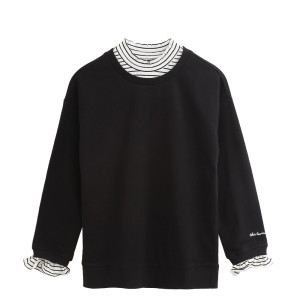

In [51]:
pil.open("data/007.png")